# Unimodal - CMU-MOSEI

In [ ]:
!git clone https://github.com/M-Jafarkhani/Multimodal-Emotion-Recognition

In [2]:
import gdown

file_id = "1zFOBHijVppTiyteSsi0aTFYPEsda_AOk"
destination = "mosei_raw.pkl"

gdown.download(
    f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1zFOBHijVppTiyteSsi0aTFYPEsda_AOk
From (redirected): https://drive.google.com/uc?id=1zFOBHijVppTiyteSsi0aTFYPEsda_AOk&confirm=t&uuid=31c92655-9df8-4349-a023-2378d9a1394a
To: /content/mosei_raw.pkl
100%|██████████| 9.94G/9.94G [00:55<00:00, 179MB/s]


'mosei_raw.pkl'

In [3]:
import sys
import torch
import matplotlib.pyplot as plt

sys.path.append('/content/Multimodal-Emotion-Recognition/src')

In [4]:
from loader import get_dataloader
from unimodals.modules import GRU, MLP
from training.unimodal import train, test
from utils import get_default_device, save_results

In [5]:
traindata, validdata, testdata = get_dataloader(
    "/content/mosei_raw.pkl", max_pad=True, max_seq_len=50
)

In [6]:
device = get_default_device()
print(device)

cuda


In [7]:
modality_num = 2

encoder = GRU(
    300, 600, dropout=True, has_padding=False, batch_first=True, last_only=True
).to(device)

head = MLP(600, 512, 1).to(device)


In [8]:
OUTPUT_MODEL_FILE_NAME = 'MOSEI_Unimodal'
train_losses, valid_losses = train(
    encoder,
    head,
    traindata,
    validdata,
    100,
    task="regression",
    optimtype=torch.optim.AdamW,
    lr=2e-3,
    weight_decay=0.01,
    criterion=torch.nn.L1Loss(),
    save_encoder=f"/content/{OUTPUT_MODEL_FILE_NAME}_encoder.pt",
    save_head=f"/content/{OUTPUT_MODEL_FILE_NAME}_head.pt",
    modalnum=modality_num,
)


Epoch [1/100]
Train Loss: 0.8370
Valid Loss: 0.8195
Saving Best

Epoch [2/100]
Train Loss: 0.6864
Valid Loss: 0.6239
Saving Best

Epoch [3/100]
Train Loss: 0.6099
Valid Loss: 0.5963
Saving Best

Epoch [4/100]
Train Loss: 0.5556
Valid Loss: 0.6118

Epoch [5/100]
Train Loss: 0.5161
Valid Loss: 0.5911
Saving Best

Epoch [6/100]
Train Loss: 0.6651
Valid Loss: 0.6339

Epoch [7/100]
Train Loss: 0.5018
Valid Loss: 0.5959

Epoch [8/100]
Train Loss: 0.4292
Valid Loss: 0.6005

Epoch [9/100]
Train Loss: 0.3870
Valid Loss: 0.6050

Epoch [10/100]
Train Loss: 0.3544
Valid Loss: 0.6169

Epoch [11/100]
Train Loss: 0.3319
Valid Loss: 0.6282

Epoch [12/100]
Train Loss: 0.3150
Valid Loss: 0.6015

Epoch [13/100]
Train Loss: 0.2986
Valid Loss: 0.6289

Epoch [14/100]
Train Loss: 0.2817
Valid Loss: 0.6193

Epoch [15/100]
Train Loss: 0.2700
Valid Loss: 0.6227

Epoch [16/100]
Train Loss: 0.2596
Valid Loss: 0.6284

Epoch [17/100]
Train Loss: 0.2551
Valid Loss: 0.6239

Epoch [18/100]
Train Loss: 0.2478
Valid Los

Text(0.5, 1.0, 'Loss vs. No. of epochs')

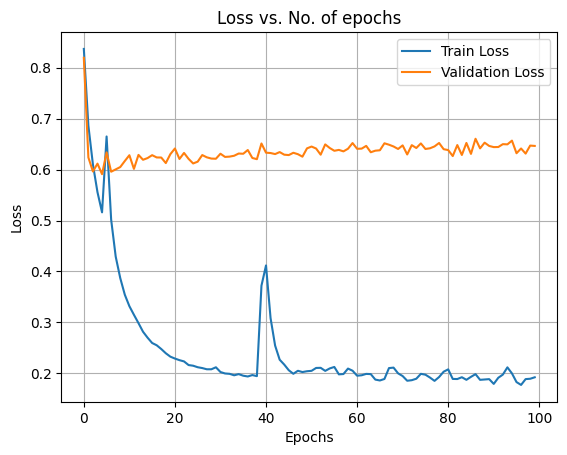

In [9]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [10]:
save_results(train_losses, valid_losses, f'/content/{OUTPUT_MODEL_FILE_NAME}.pkl')

In [11]:
encoder = torch.load(
    f"/content/{OUTPUT_MODEL_FILE_NAME}_encoder.pt"
).to(device)
head = torch.load(
    f"/content/{OUTPUT_MODEL_FILE_NAME}_head.pt"
).to(device)

test(
    encoder,
    head,
    testdata,
    criterion=torch.nn.L1Loss(),
    task="posneg-classification",
    modalnum=modality_num,
)

<ipython-input-11-873f8a5316df>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load(
<ipython-input-11-873f8a5316df>:4: FutureWarning: You are using `torch

Loss: 0.6181
Recall: 80.1210% | Total Accuracy: 70.0129%
Inference Time: 1s378ms
Inference Params: 1931825
